In [1]:
import csv
import sys
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
import matplotlib.cm as cm
from netCDF4 import Dataset
import xarray as xr
import matplotlib.colors as colors
import matplotlib.colors as mcolors
import numpy as np

fname = Dataset("gebco_2020_n20.0_s17.0_w-69.0_e-64.0.nc")
fname


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    title: The GEBCO_2020 Grid - a continuous terrain model for oceans and land at 15 arc-second intervals
    institution: On behalf of the General Bathymetric Chart of the Oceans (GEBCO), the data are held at the British Oceanographic Data Centre (BODC).
    source: The GEBCO_2020 Grid is the latest global bathymetric product released by the General Bathymetric Chart of the Oceans (GEBCO) and has been developed through the Nippon Foundation-GEBCO Seabed 2030 Project. This is a collaborative project between the Nippon Foundation of Japan and GEBCO. The Seabed 2030 Project aims to bring together all available bathymetric data to produce the definitive map of the world ocean floor and make it available to all.
    history: Information on the development of the data set and the source data sets included in the grid can be found in the data set documentation available f

In [2]:
import pandas as pd

datos = pd.read_csv("Data_Marzo15.csv")
datos = pd.DataFrame(datos)
datos


,Unnamed: 0,UTC Time,Lat,Long,Depth,Mag,Network,RMS,ERH,ERZ,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Color
0,0,2020-01-03 18:14,17.9345,-66.9021,6.0,2.39 md,RSPR,0.14,0.63,0.30,...,"15km S of Guanica, Puerto Rico",earthquake,0.63,0.30,0.310,13,reviewed,pr,pr,Amarillo
1,1,2020-01-04 03:48,18.0286,-66.8476,7.0,1.57 md,RSPR,0.07,2.69,1.46,...,"35km SSE of Punta Cana, Dominican Republic",earthquake,6.00,2.99,0.320,11,reviewed,pr,pr,Amarillo
2,2,2020-01-06 10:32,17.8675,-66.8193,6.0,5.8 mwp,RSPR,0.29,1.70,1.14,...,"9km SE of Indios, Puerto Rico",earthquake,1.70,1.14,0.000,0,reviewed,pr,pr,Amarillo
3,3,2020-01-07 08:24,17.9578,-66.8113,6.0,6.4 md,RSPR,0.25,1.26,2.11,...,"13km S of Indios, Puerto Rico",earthquake,2.50,2.10,0.049,40,reviewed,us,us,Amarillo
4,4,2020-01-07 08:47,17.9440,-66.7665,13.0,0.00 md,RSPR,0.20,1.57,1.24,...,"5km NNE of Adjuntas, Puerto Rico",earthquake,1.30,2.00,0.085,18,reviewed,us,us,A verde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,121,2021-02-22 21:49,19.0485,-66.7063,49.0,3.37 md,RSPR,0.24,1.05,2.80,...,"63 km N of Carrizales, Puerto Rico",earthquake,1.05,2.80,0.090,13,reviewed,pr,pr,Amarillo
119,122,2021-02-23 10:23,18.6288,-66.7376,14.0,3.16 md,RSPR,0.36,1.02,1.20,...,Puerto Rico region,earthquake,1.02,1.20,0.140,13,reviewed,pr,pr,Amarillo
120,123,2021-02-25 06:28,18.4883,-68.9530,114.0,3.89 md,RSPR,0.19,1.15,1.36,...,"7 km NNE of La Romana, Dominican Republic",earthquake,1.15,1.36,0.160,11,reviewed,pr,pr,Amarillo
121,124,2021-02-27 05:30,18.9936,-65.3225,15.0,3.23 md,RSPR,0.27,8.42,16.98,...,"76 km N of Culebra, Puerto Rico",earthquake,8.42,16.98,0.190,7,reviewed,pr,pr,Amarillo


In [3]:
datos.dtypes

Unnamed: 0           int64
UTC Time            object
Lat                float64
Long               float64
Depth              float64
Mag                 object
Network             object
RMS                float64
ERH                float64
ERZ                float64
GAP                float64
Q                   object
Int                 object
nStat                int64
time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst               int64
status              object
locationSource      object
magSource           object
Color               object
d

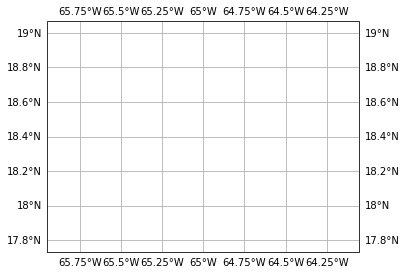

In [4]:
minlon, maxlon = -66, -64 
minlat, maxlat = 17.7, 19.1

#fig = plt.figure()
lat0 = (maxlat + minlat)/2.0
lon0 = (maxlon + minlon)/2.0
proj_kwargs={}
#Mercator
proj_kwargs['central_longitude'] = lon0
proj_kwargs['min_latitude']= minlat
proj_kwargs['max_latitude']= maxlat
proj = ccrs.Mercator(**proj_kwargs)

map_ax = plt.axes([0.11,0.11,0.8,0.8],projection=proj)
x0, y0 = proj.transform_point(lon0, lat0, proj.as_geodetic())
deg2m_lat = 2 * np.pi * 6371 * 1000 / 360
deg2m_lon = deg2m_lat * np.cos(lat0 / 180 * np.pi)
height = (maxlat - minlat) * deg2m_lat
width = (maxlon - minlon) * deg2m_lon
map_ax.set_xlim(x0 - width / 2, x0 + width / 2)
map_ax.set_ylim(y0 - height / 2, y0 + height / 2)
map_ax.gridlines(draw_labels=True)
#Plot etopo2 grid
#If using harmonica un comment to get etopo1
#data = hm.datasets.fetch_topography_earth()


In [5]:
ela = fname.variables['elevation'][:]
lats = fname.variables['lat'][:]
lons = fname.variables['lon'][:]

#fname.variables['elevat
#import pandas as pd
#df = pd.DataFrame(ela)
#df
#df2 = pd.DataFrame(lats)
#df2


/home/sandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()
/home/sandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


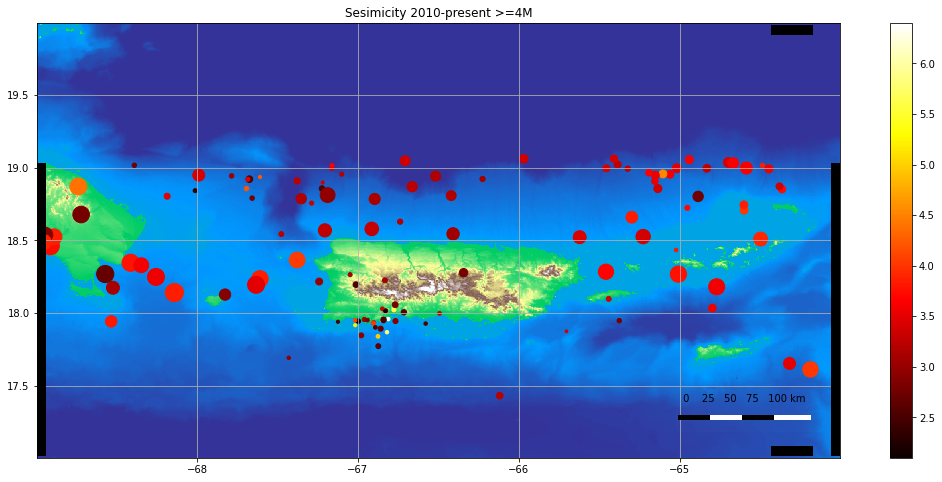

In [41]:
#Construimos la figura
fig, ax = plt.subplots(figsize=(18, 8))

############################# COLORES #################################
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))                    #Coloreamos el mar
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))                        #Coloreamos la tierra
all_colors = np.vstack((colors_undersea, colors_land))                         #Unimos ambas
terrain_map = colors.LinearSegmentedColormap.from_list('terrain_map', all_colors)   #le asignamos el color al mapa
#########################################################################


############################# MAPA  #####################################
divnorm = colors.TwoSlopeNorm(vmin=-5000, vcenter=0, vmax=1000)
#ivnorm = colors.TwoSlopeNorm(vmin=-2000, vcenter=0, vmax=1000)            #¿Normalización?, Si lo quitamos parece que no pasa nada    
proj = ccrs.PlateCarree()                                                  #La proyección que queremos
ax.pcolormesh(lons, lats, ela, cmap=terrain_map, norm=divnorm)             #Asignamos las longitudes y latitudes donde estaremos 
#########################################################################


############################# DATOS #################################

mesh = ax.scatter(x = datos["Long"], y = datos["Lat"], c = datos["mag"],
                  s = datos["Depth"]*2,  cmap = "hot")

"""
mesh = ax.scatter(x = datos["Long"], y = datos["Lat"], c = datos["Depth"],
                  s = datos["mag"]*5,  cmap = "hot")

"""
fig.colorbar(mesh)
############################ ESCALA ##################################


#ax.plot([-66, -64], [17.5,17.5], 'k-', lw=10)
ax.text(-65, 17.23, ' 0    25   50   75   100 km \n \n ',  
        bbox=dict(facecolor='none', edgecolor='black', color='lavender', alpha=0.01))
plt.plot([-65, -64.8], [17.28,17.28], 'k-', lw=5)
plt.plot([-64.8, -64.6], [17.28,17.28], 'w-', lw=5)
plt.plot([-64.6, -64.4], [17.28,17.28], 'k-', lw=5)
plt.plot([-64.4, -64.2], [17.28,17.28], 'w-', lw=5)

#for i in range(0,4):
#    plt.plot([-65, -64.8], [17.48,17.48], 'k-', lw=5)
#    plt.plot([-64.8, -64.6], [17.48,17.48], 'w-', lw=5)
#    plt.plot([-64.6, -64.4], [17.48,17.48], 'k-', lw=5)
#    plt.plot([-64.4, -64.2], [17.48,17.48], 'w-', lw=5)

    
plt.plot([-64.4, -64.2], [17.05,17.05], 'k-', lw=10)
plt.plot([-64.4, -64.2], [19.95,19.95], 'k-', lw=10)
plt.plot([-68.97, -68.97], [17.05,19], 'k-',lw=10)
plt.plot([-64.03, -64.03], [17.05,19], 'k-',lw=10)

#plt.axhline(y=17.5, xmin=-66, xmax=-64, lw = 10)
#x = np.linspace(-69,-67,250)
#y = np.sin(x)
#ax.plot(x,y)
#######################################################################



plt.title("Sesimicity 2010-present >=4M")
plt.grid()
plt.show()

/home/sandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


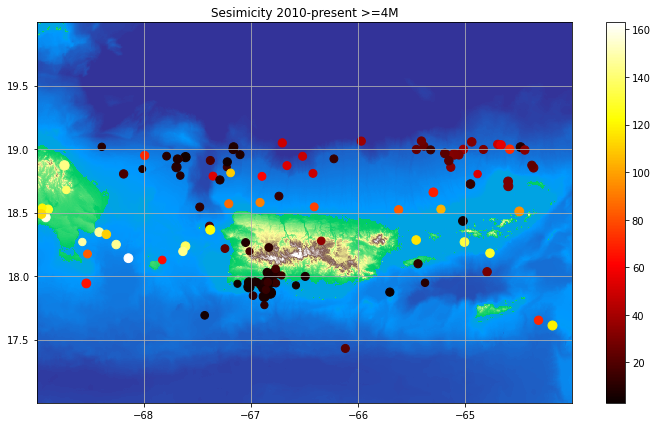

In [7]:
#Construimos la figura
fig, ax = plt.subplots(figsize=(12, 7))


############################# COLORES #################################
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))                    #Coloreamos el mar
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))                        #Coloreamos la tierra
all_colors = np.vstack((colors_undersea, colors_land))                         #Unimos ambas
terrain_map = colors.LinearSegmentedColormap.from_list('terrain_map', all_colors)   #le asignamos el color al mapa
#########################################################################


############################# MAPA  #####################################
divnorm = colors.TwoSlopeNorm(vmin=-6000, vcenter=0, vmax=1000)
#ivnorm = colors.TwoSlopeNorm(vmin=-2000, vcenter=0, vmax=1000)            #¿Normalización?, Si lo quitamos parece que no pasa nada    
proj = ccrs.PlateCarree()                                                  #La proyección que queremos
ax.pcolormesh(lons, lats, ela, cmap=terrain_map, norm=divnorm)             #Asignamos las longitudes y latitudes donde estaremos 
#########################################################################


############################# DATOS #################################
"""
mesh = ax.scatter(x = datos["Long"], y = datos["Lat"], c = datos["mag"],
                  s = datos["Depth"]*2,  cmap = "hot")

"""
mesh = ax.scatter(x = datos["Long"], y = datos["Lat"], c = datos["Depth"],
                  s = datos["mag"]*20,  cmap = "hot")


fig.colorbar(mesh)
#####################################################################


plt.title("Sesimicity 2010-present >=4M")
plt.grid()
plt.show()

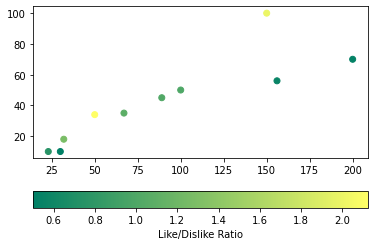

In [8]:
# Python Program illustrating 
# pyplot.colorbar() method 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Dataset 
# List of total number of items purchased  
# from each products 
purchaseCount = [100, 200, 150, 23, 30, 50, 
                 156, 32, 67, 89] 
  
# List of total likes of 10 products 
likes = [50, 70, 100, 10, 10, 34, 56, 18, 35, 45] 
  
# List of Like/Dislike ratio of 10 products 
ratio = [1, 0.53, 2, 0.76, 0.5, 2.125, 0.56,  
         1.28, 1.09, 1.02] 
  
# scatterplot 
plt.scatter(x=purchaseCount, y=likes, c=ratio, cmap="summer") 
  
plt.colorbar(label="Like/Dislike Ratio", orientation="horizontal") 
plt.show() 

<xarray.Dataset>
Dimensions:    (latitude: 10801, longitude: 21601)
Coordinates:
  * longitude  (longitude) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * latitude   (latitude) float64 -90.0 -89.98 -89.97 ... 89.97 89.98 90.0
Data variables:
    bedrock    (latitude, longitude) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1 Bedrock Relief
    GMT_version:  4.4.0
    node_offset:  0
    doi:          10.7289/V5C8276M


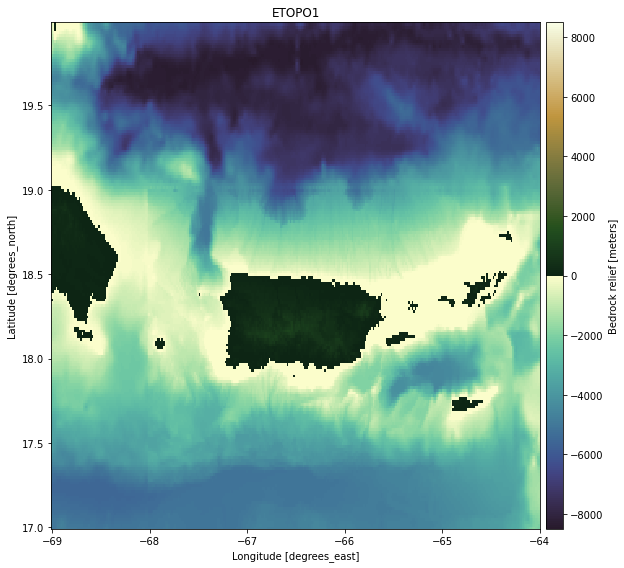

In [9]:
import rockhound as rh
import matplotlib.pyplot as plt
import cmocean

# Load a version of the topography grid
grid = rh.fetch_etopo1(version="bedrock")
print(grid)

# Select a subset that corresponds to Africa to make plotting faster given the
# size of the grid.
Puerto_Rico = grid.sel(latitude=slice(17, 20), longitude=slice(-69, -64))

# Plot the age grid.
# We're not using a map projection to speed up the plotting but this NOT
# recommended.
plt.figure(figsize=(9, 8))
ax = plt.subplot(111)
Puerto_Rico.bedrock.plot.pcolormesh(
    cmap=cmocean.cm.topo, cbar_kwargs=dict(pad=0.01, aspect=30), ax=ax
)
ax.set_title("ETOPO1")
plt.tight_layout()
plt.show()

<xarray.Dataset>
Dimensions:    (latitude: 10801, longitude: 21601)
Coordinates:
  * longitude  (longitude) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * latitude   (latitude) float64 -90.0 -89.98 -89.97 ... 89.97 89.98 90.0
Data variables:
    bedrock    (latitude, longitude) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1 Bedrock Relief
    GMT_version:  4.4.0
    node_offset:  0
    doi:          10.7289/V5C8276M


NameError: name 'africa' is not defined

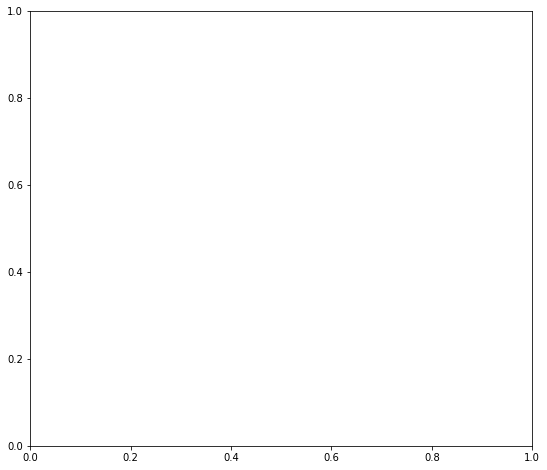

In [10]:
import rockhound as rh
import matplotlib.pyplot as plt
import cmocean

# Load a version of the topography grid
grid = rh.fetch_etopo1(version="bedrock")
print(grid)

# Select a subset that corresponds to Africa to make plotting faster given the
# size of the grid.
Puerto_Rico = grid.sel(latitude=slice(17, 20), longitude=slice(-69, -64))

# Plot the age grid.
# We're not using a map projection to speed up the plotting but this NOT
# recommended.
plt.figure(figsize=(9, 8))
ax = plt.subplot(111)
africa.bedrock.plot.pcolormesh(
    cmap=cmocean.cm.algae, cbar_kwargs=dict(pad=0.01, aspect=30), ax=ax
)
ax.set_title("ETOPO1")
plt.tight_layout()
plt.show()